# Imports

In [48]:
from sklearn.datasets import load_iris
import numpy as np
from random import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from sklearn.cluster import KMeans

%matplotlib inline

# Data

In [49]:
iris = load_iris()
data = iris.data

# Functions

In [50]:
def get_centroids(data, k):
    return np.array(sample(data.tolist(), k))

In [51]:
def get_clusters(data, centroids):
    cluster_distances = np.array([((c - data) ** 2).sum(axis=1) for c in centroids]).T
    return np.argmin(cluster_distances, axis=1)

In [52]:
def update_centroids(data, clusters, k):
    return np.array([data[clusters == j].mean(axis=0) for j in range(k)])

In [53]:
def sse(data, centroids, clusters, k):
    return sum([((data[clusters==j] - centroids[j]) ** 2).sum() for j in range(k)])

In [54]:
def plot_clusters(data, centroids, clusters, iteration, display):
    if not display:
        return
    fig = plt.figure(figsize=(20,5))
    fig.suptitle("Update {0}".format(iteration) , fontsize=16)
    for i, (a, b, c) in enumerate(combinations(range(data.shape[1]), 3)):    
        ax = fig.add_subplot(1, 4, i + 1, projection='3d')
        ax.view_init(35, 45)
        ax.scatter(data[:,a], data[:,b], data[:,c], c=clusters)
        ax.plot(centroids[:,a], centroids[:,b], centroids[:,c], marker='+', color='red', markersize=3)
    plt.show()

In [55]:
def no_change(before, after, epsilon):
    return np.all(((before - after) ** 2).sum(axis=1) < epsilon)

In [56]:
def k_means(data, k, max_iterations, epsilon, display=False):
    centroids = get_centroids(data, k)
    for i in range(max_iterations):
        clusters = get_clusters(data, centroids)
        centroids_prime = update_centroids(data, clusters, k)
        plot_clusters(data, centroids_prime, clusters, i, display)
        if no_change(centroids, centroids_prime, epsilon):
            break
        centroids = centroids_prime
    return sse(data, centroids, clusters, k), clusters

# Get Clusters

In [57]:
errors = []
for i in range(1, 10):
    err, _ = k_means(data, i, 30, 0.001)
    errors.append(err)

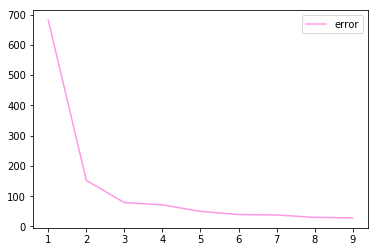

In [58]:
plt.plot(range(1, 10), errors, color='#ff33cc', alpha=0.5, label='error')
plt.legend()
plt.show()

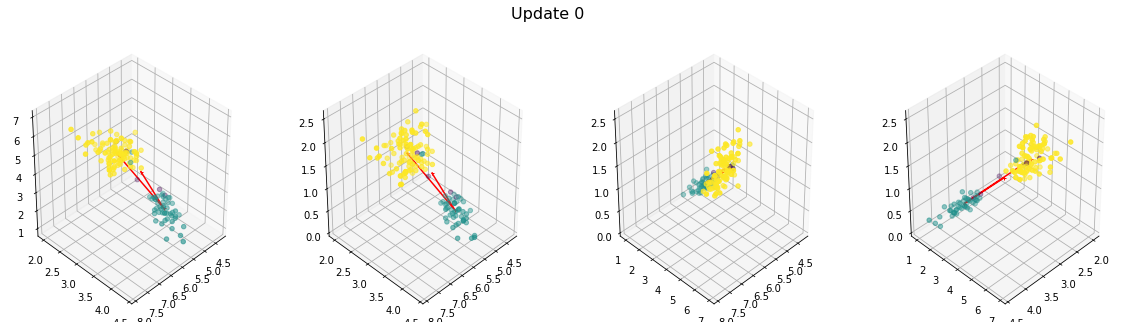

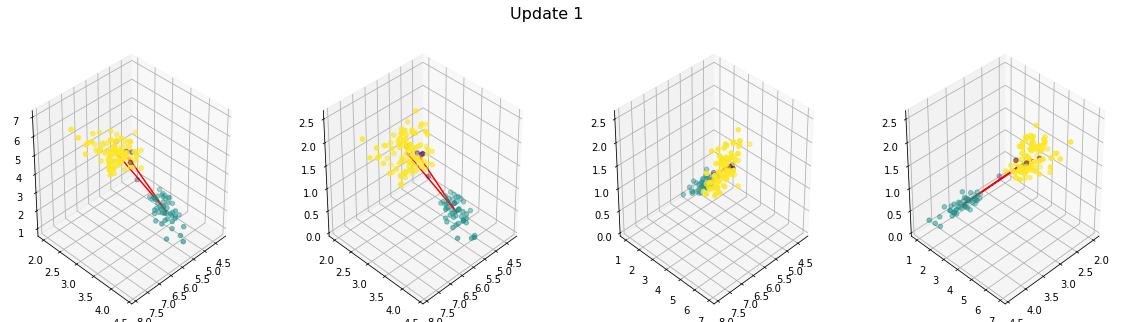

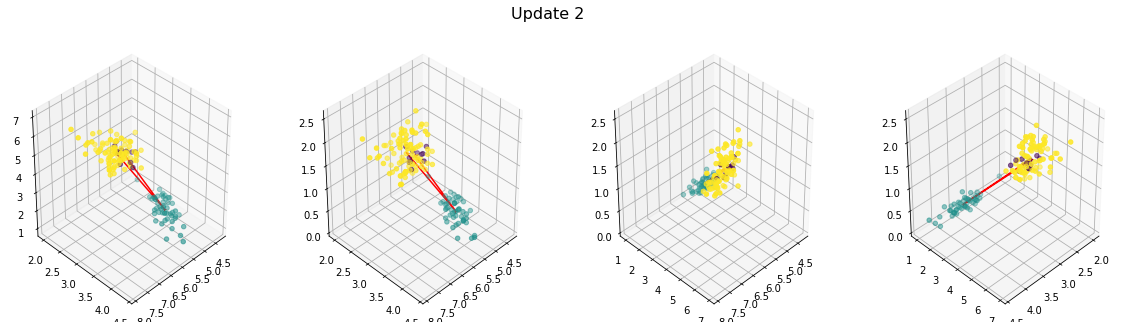

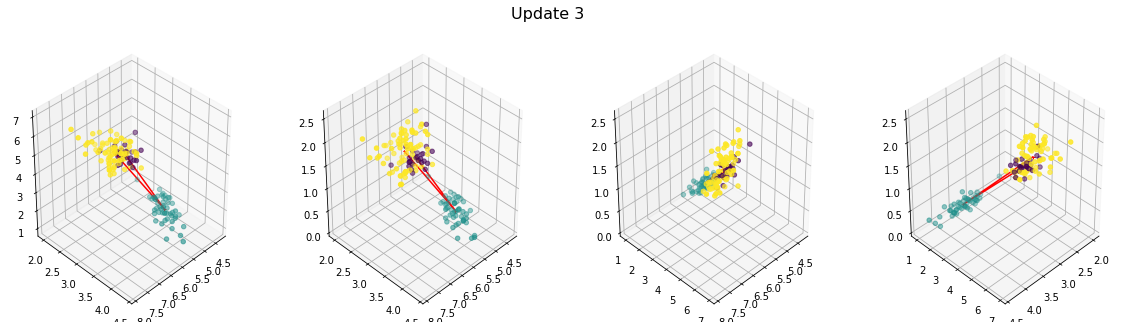

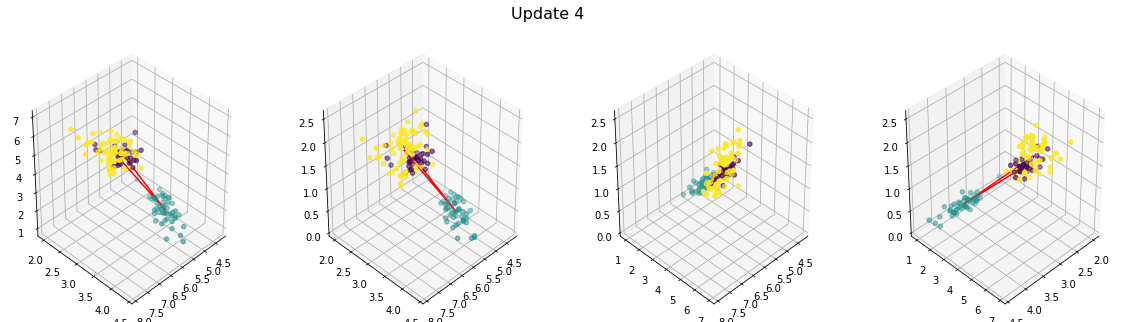

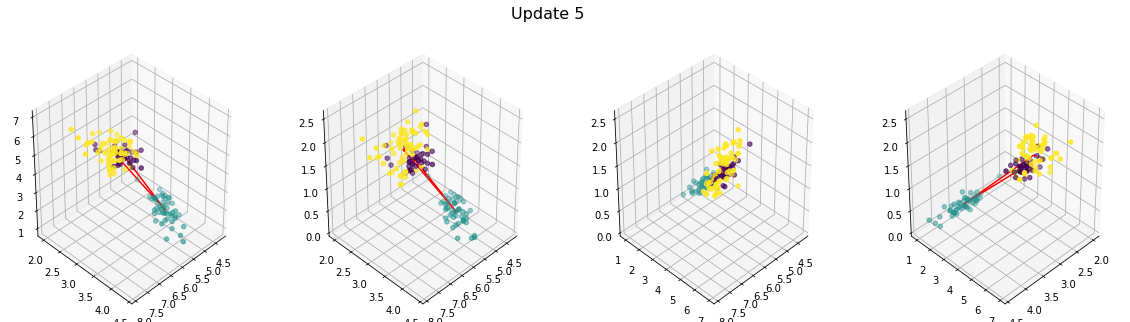

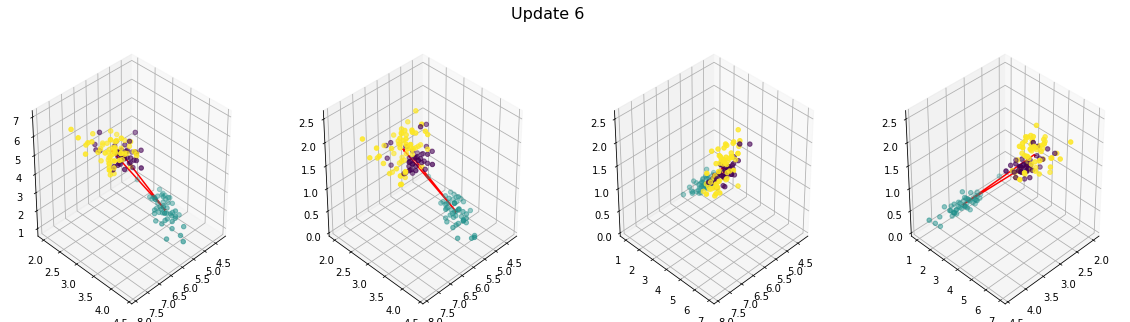

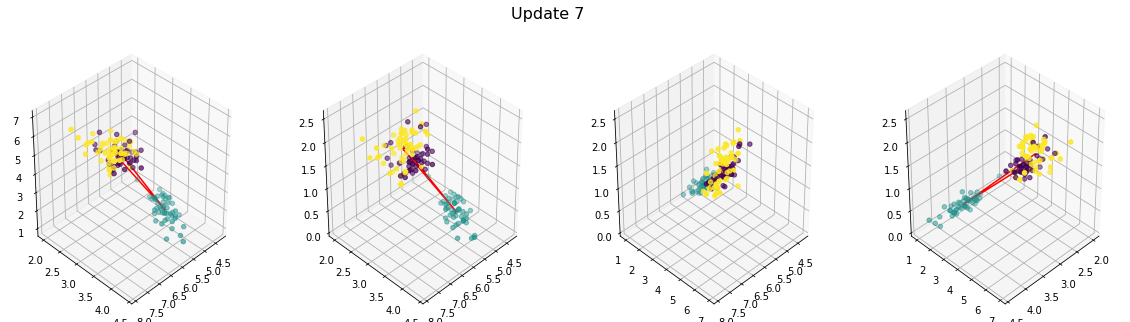

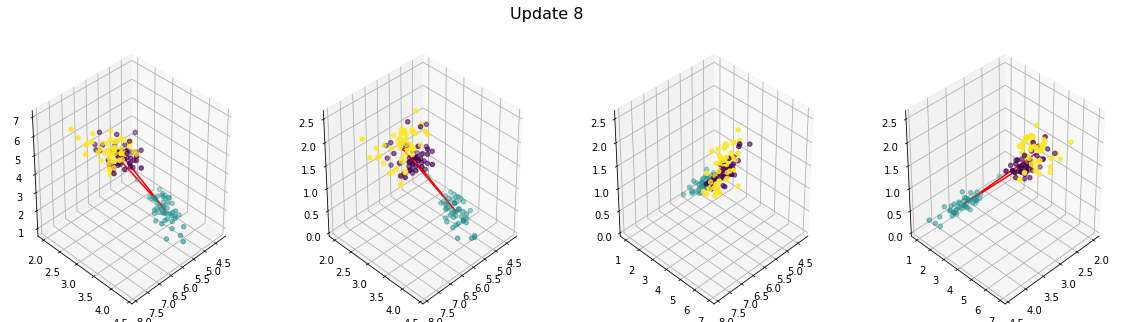

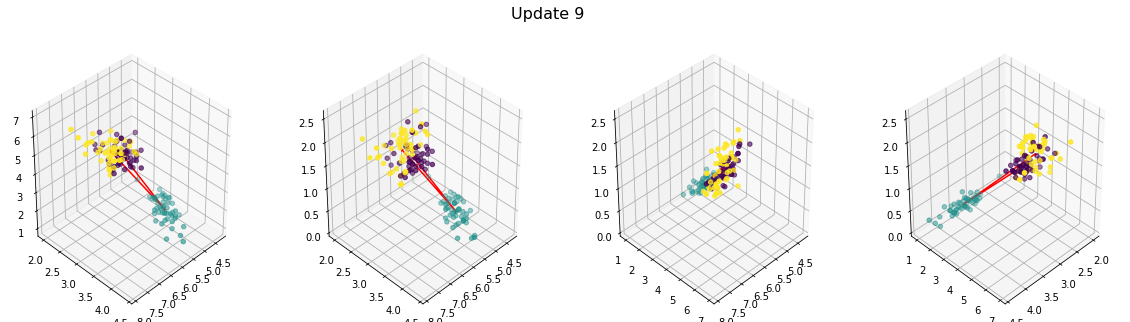

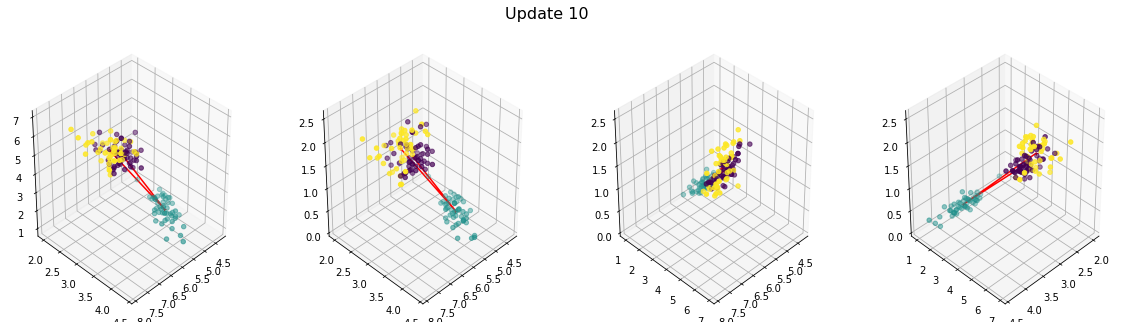

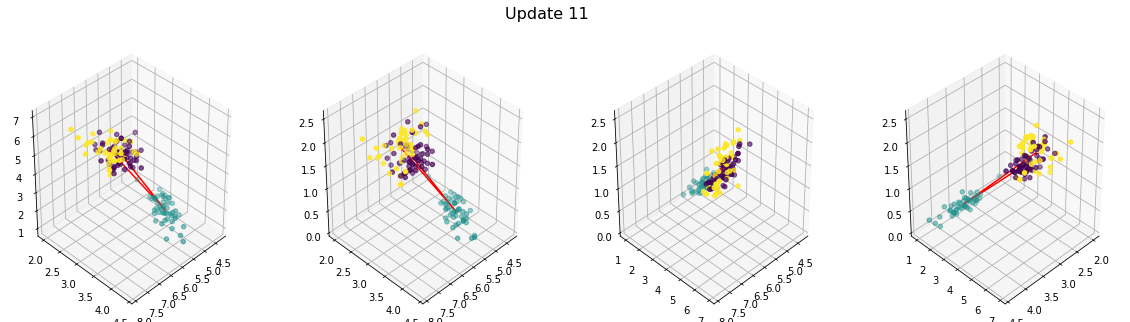

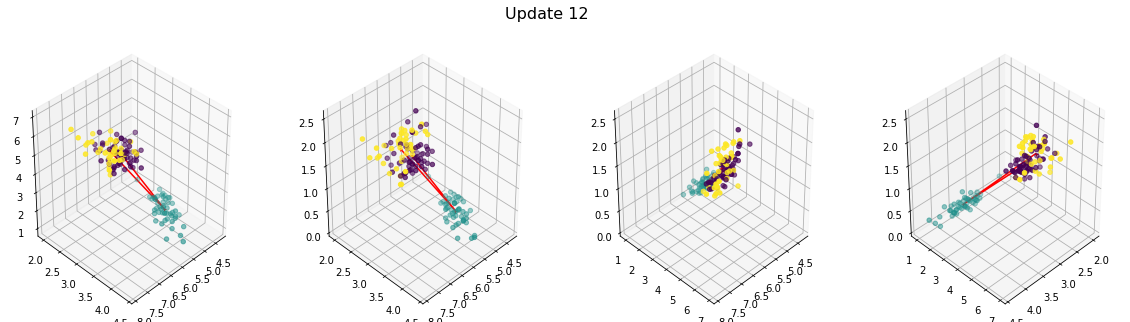

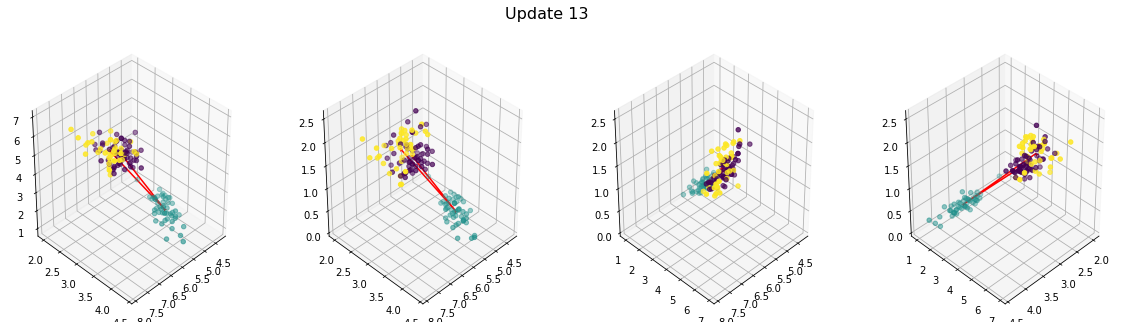

In [59]:
_, clusters = k_means(data, 3, 30, 0.001, True)

# KMeans

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

In [61]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [62]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [63]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# fin